In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("train_agriculture.xlsx")
df.sample(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
2908,F00005140,2688,0,0,3,10,56.0,0,2,1
663,F00001188,2267,1,1,3,10,48.0,0,1,0
1284,F00002264,2840,0,0,2,40,27.0,30,1,0
4389,F00007719,1385,0,1,2,30,15.0,19,1,0
85,F00000164,531,0,1,3,60,19.0,0,2,0


We have Index for our purpose, so we don't have any need for ID of the dataset, we shall remove it right away.

In [3]:
#Dropping ID

df.drop("ID",1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


All the columns have no null values, except for one column i.e. Number_Weeks_Used used which has lots of missing values(442 missing values)

All columns are numeric, no categorical data, good for our model.

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Data looks fine, as there seems no visible outliers. While some columns have 2-3 unique values like Crop_Type, Soil_Type, Pesticide_Use_Category, Season and our target variable too.

# Univariate Analysis.

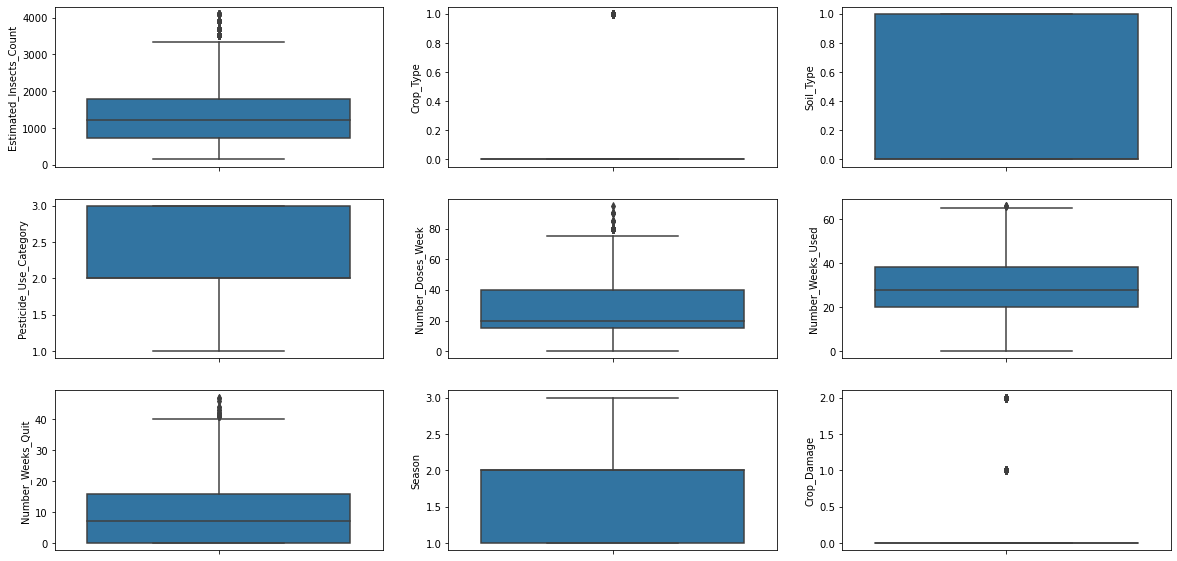

In [6]:
plt.figure(figsize=(20,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[j], orient="v")


There are some outliers in Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit columns, but not so many, seems we dont need to treat the outliers.

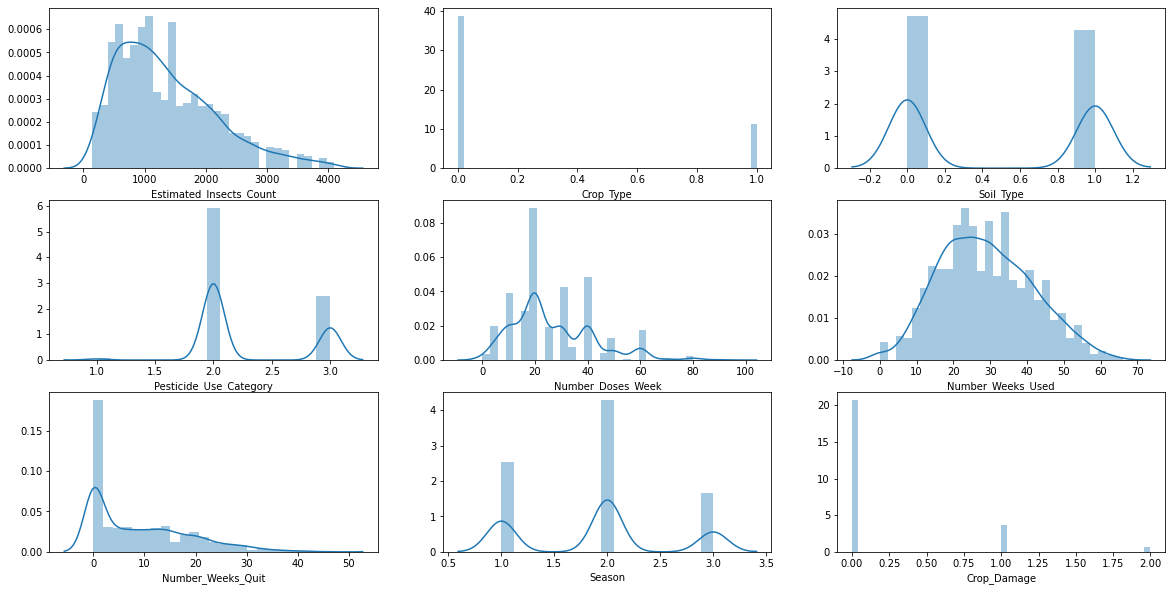

In [7]:
plt.figure(figsize=(20,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.distplot(df[j])

Estimated_Insects_Count, Number_Weeks_Quit are positively skewed.

In [8]:
df['Estimated_Insects_Count'].skew()

0.9114689972451613

In [9]:
df['Number_Weeks_Quit'].skew()

0.9197714184164273

Does not seems like so much skewness, so we shall not treat skewness.

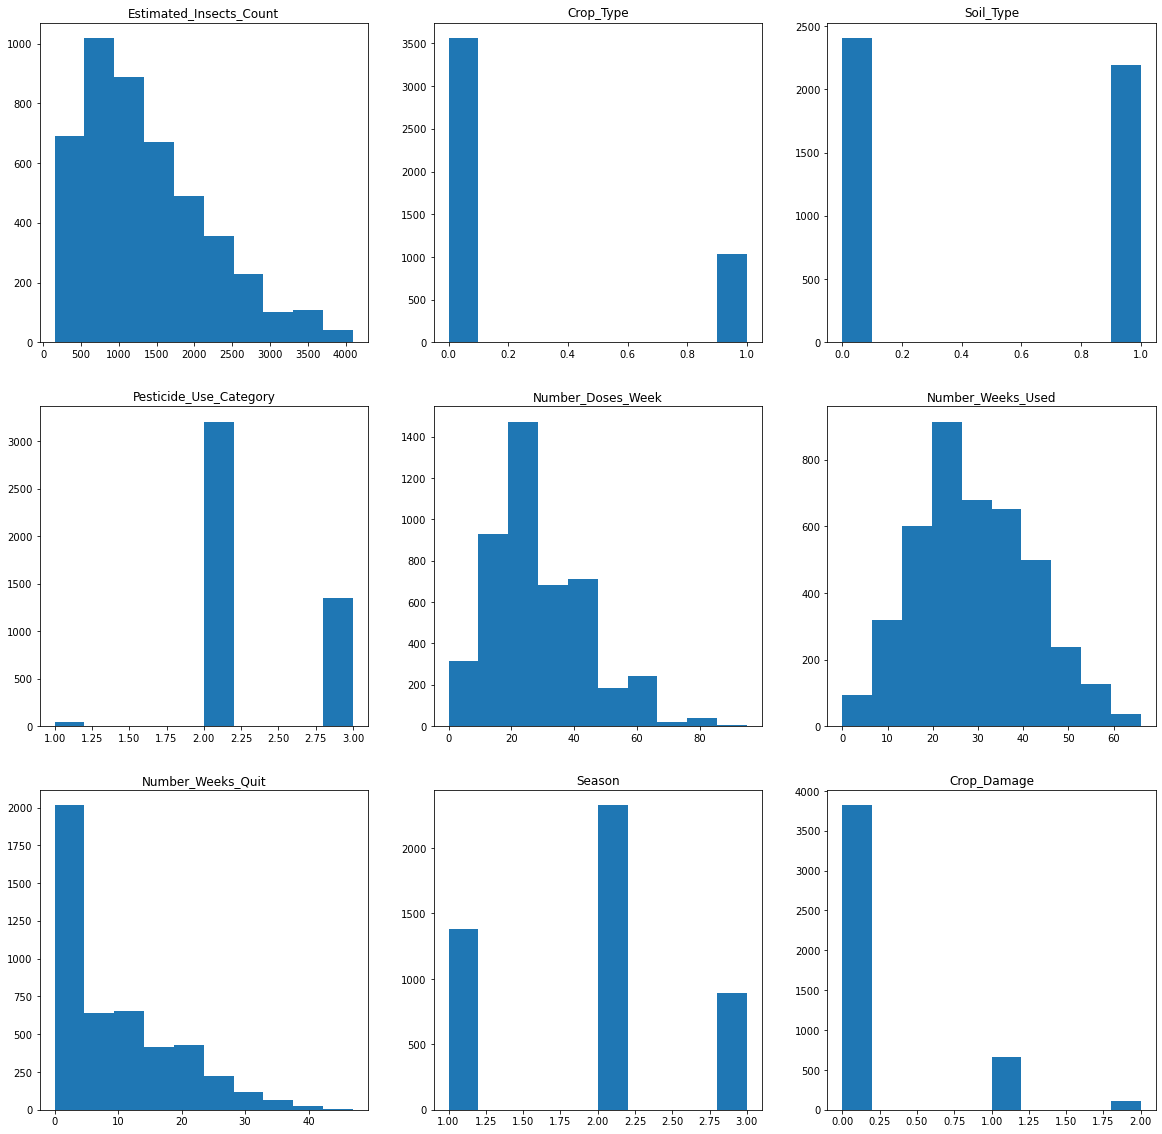

In [10]:
#Histogram

str=""
plt.figure(figsize=(20,20))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j])
    str=df[j]
    plt.title(df.columns[i])

There are very less counts for some values in some columns, like in Pesticide_Use_Category(very less records for category 1) and Crop_Damage(very less records for category 2), which may lead to model not learning well for those data. We might need to use oversample for these 2 variables.

# Bivariate analysis

In [11]:
df[df['Number_Weeks_Used'].isnull()]

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,448,0,1,1,0,NaN,0,2,1
6,448,0,1,1,0,NaN,0,2,1
10,1212,1,0,1,0,NaN,0,3,0
17,2401,0,1,1,0,NaN,0,1,1
35,257,0,0,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...
4538,1898,0,1,2,35,NaN,13,2,0
4548,2015,0,1,2,10,NaN,18,1,0
4558,2015,0,1,2,20,NaN,12,2,0
4578,2139,0,1,2,20,NaN,22,2,0


In [12]:
df[['Number_Weeks_Used', 'Crop_Damage']].corr()

,Number_Weeks_Used,Crop_Damage
Number_Weeks_Used,1.000000,0.244988
Crop_Damage,0.244988,1.000000


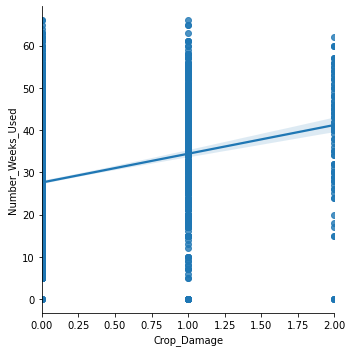

In [13]:
sns.lmplot(y='Number_Weeks_Used', x='Crop_Damage', data=df)

Number_Weeks_Used is substantially positively related to our target variable, so it's better to treat the null values, can't just drop it.

We will find the column with highest relation to Number_Weeks_Used, so we can treat its null values based on highest related column.

In [14]:
df[["Number_Weeks_Used", "Number_Weeks_Quit"]].sort_values(by="Number_Weeks_Quit", ascending=False)

,Number_Weeks_Used,Number_Weeks_Quit
1329,10.0,47
1324,10.0,47
1326,9.0,46
1291,10.0,44
2174,NaN,44
...,...,...
2740,35.0,0
2741,20.0,0
2742,43.0,0
2743,41.0,0


Number_Weeks_Quit is highest related to the column Numb_Weeks_Used that is .47(approx 50%). We can use a formula to replace the NaN value of Number_Weeks_Used by subtracting the Number_Weeks_Quit from Maximum value of Number_Weeks_Used and finally dividing by 2 as it is 50%  related and also we can see that from some of the values from the above table.

In [15]:
#Treating Number_Weeks_Used null values
df.loc[df["Number_Weeks_Used"].isnull(), "Number_Weeks_Used"] = (df["Number_Weeks_Used"].max() - df["Number_Weeks_Quit"])/2

In [16]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

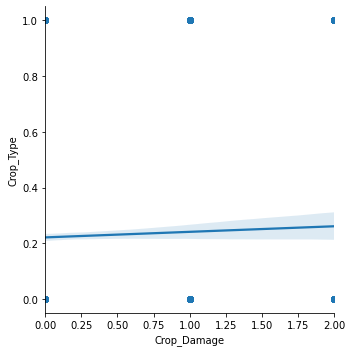

In [17]:
sns.lmplot(y="Crop_Type", x="Crop_Damage", data=df)

Almost all crop type has equal number of damages.

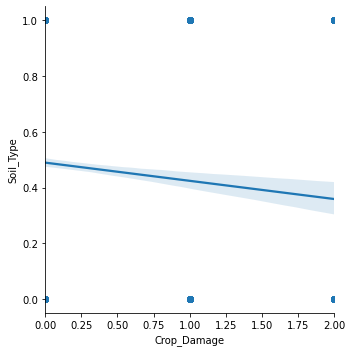

In [18]:
sns.lmplot(y="Soil_Type", x="Crop_Damage", data=df)

With the increase in type of soil type there is decrease in damage, we can see a negative impact on damage of soil type as it increases.

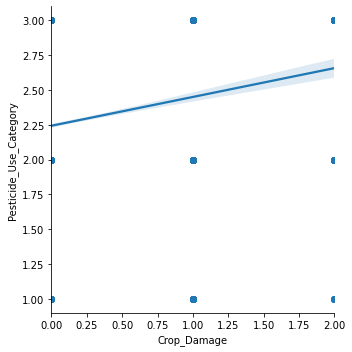

In [19]:
sns.lmplot(y="Pesticide_Use_Category", x="Crop_Damage", data=df)

Increase of pesticide category type increases damage.

We can say that pesticide category lower the better, it is also possible that for different crop type and different pests farmers have to use different pesticide which cause damage. As of now nothing to say much as to which category is best applicale for which crop.

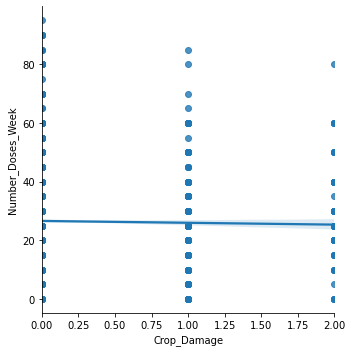

In [20]:
sns.lmplot(y="Number_Doses_Week", x="Crop_Damage", data=df)

No visible impact of number of doses per week on damage.

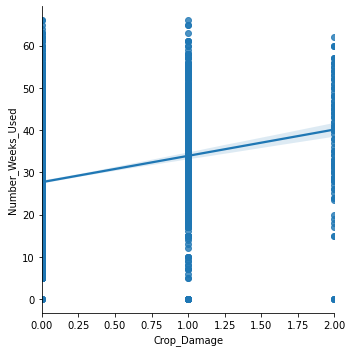

In [21]:
sns.lmplot(y="Number_Weeks_Used", x="Crop_Damage", data=df)

Prolonged usage of Pesticide has a positive impact on damage.

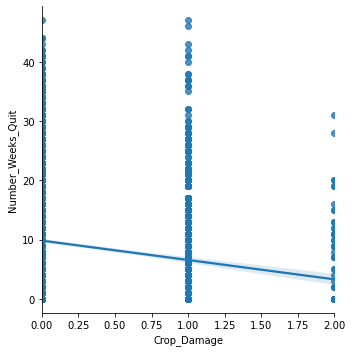

In [22]:
sns.lmplot(y="Number_Weeks_Quit", x="Crop_Damage", data=df)

As opposed to the prolonged usage. quit is inversely related to prolonged usage, hence we can see its negative impact on damage.

We can say that prolonged usage should be avoided and number of weeks without pesticide whould be more.

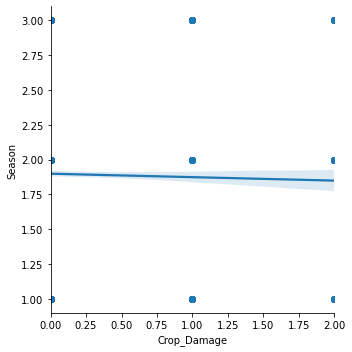

In [23]:
sns.lmplot(y="Season", x="Crop_Damage", data=df)

Almost all seasons have damage equally, since we have negligible slope.

In [24]:
df.corr().sort_values(by="Crop_Damage", ascending=False)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.235050,-0.152918,-0.016196,1.000000
Number_Weeks_Used,0.417196,0.008455,-0.092874,0.386434,0.100215,1.000000,-0.478345,-0.011599,0.235050
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.417196,0.246719,-0.009482,0.202312
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.386434,-0.569467,0.008487,0.199195
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,0.008455,-0.273475,-0.000549,0.021772
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011599,0.004861,1.000000,-0.016196
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.100215,-0.032381,-0.003768,-0.018363
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.092874,-0.034355,0.011052,-0.059481
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.478345,1.000000,0.004861,-0.152918


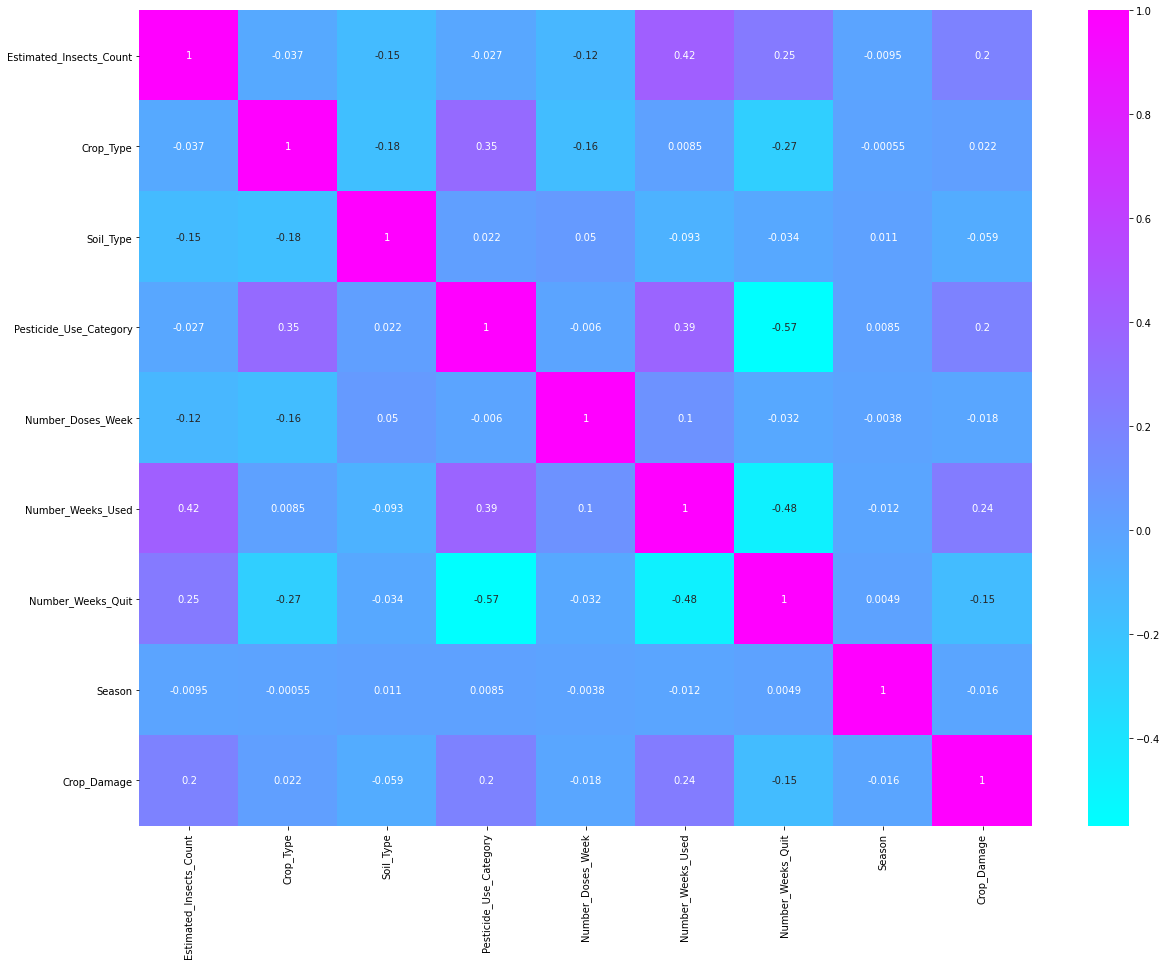

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

Columns [Number_Weeks_Used , Estimated_Insects_Count , Pesticide_Use_Category , Crop_Type] have positive correlation with the damage.

Colunms [Season , Number_Doses_Week , Soil_Type , Number_Weeks_Quit] have negative correlation with damage.

In [26]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.883344,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.052063,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.500000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


We have columns with high magnitudes like "Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit", we need to scale them in order for our model to learn well.

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [28]:
arr = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]
for i in arr:
    df[i] = mms.fit_transform(df[[i]])

In [29]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,0.307322,0.224831,0.476625,2.283540,0.278710,0.437626,0.195861,1.894325,0.194390
std,0.206344,0.417517,0.499508,0.471978,0.163417,0.182607,0.206665,0.694952,0.454597
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.147200,0.000000,0.000000,2.000000,0.157895,0.303030,0.000000,1.000000,0.000000
50%,0.269065,0.000000,0.000000,2.000000,0.210526,0.431818,0.148936,2.000000,0.000000
75%,0.414492,0.000000,1.000000,3.000000,0.421053,0.545455,0.340426,2.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000


In [30]:
#Split test train sets

X = df.drop("Crop_Damage",1)
y = df["Crop_Damage"]
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.009628,1,0,1,0.000000,0.000000,0.000000,1
1,0.014948,1,0,1,0.000000,0.000000,0.000000,2
2,0.027109,1,0,1,0.000000,0.000000,0.000000,2
3,0.027109,1,1,1,0.000000,0.000000,0.000000,2
4,0.048645,1,0,1,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...
4594,0.503674,0,1,2,0.210526,0.492424,0.021277,1
4595,0.503927,0,1,2,0.315789,0.712121,0.042553,1
4596,0.536357,0,1,2,0.105263,0.106061,0.574468,2
4597,0.536357,0,1,2,0.105263,0.303030,0.510638,2


In [31]:
y.value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

Let's oversample the y set as we have little rows for sample 2 as compared to sample 0

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=5)

In [33]:
X , y = sm.fit_resample(X , y)

In [34]:
y.value_counts()

2    3820
1    3820
0    3820
Name: Crop_Damage, dtype: int64

In [35]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.009628,1,0,1,0.000000,0.000000,0.000000,1
1,0.014948,1,0,1,0.000000,0.000000,0.000000,2
2,0.027109,1,0,1,0.000000,0.000000,0.000000,2
3,0.027109,1,1,1,0.000000,0.000000,0.000000,2
4,0.048645,1,0,1,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...
11455,0.307436,0,0,3,0.270458,0.679496,0.000000,3
11456,0.078400,1,0,1,0.383700,0.276148,0.174502,1
11457,0.544258,1,0,3,0.362505,0.781067,0.000000,2
11458,0.269181,0,0,3,0.211085,0.636484,0.000000,3


In [36]:
X['Pesticide_Use_Category'].value_counts()

2    5646
3    5437
1     377
Name: Pesticide_Use_Category, dtype: int64

We had very less rows for sample 1 in column Pesticide_Use_Category, but after oversampling damage, the sampe size has fortunately increased significantly. This can produce better working model.

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, f1_score, accuracy_score, roc_auc_score, make_scorer, average_precision_score

In [39]:
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
etc = ExtraTreeRegressor()
knc = KNeighborsClassifier()
gnc = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
gbc = GradientBoostingRegressor()

In [40]:
models = [lm, dtc, etc, knc, gnc, svc, rfc, gbc]
modelname = ['Logistic Regression', 'DecisionTree Classification', "ExtraTree Classification",
             'KNeighbors Classification', 'Gaussian NB', 'SVC',
             'RandomForestClassifier', 'GradientBoostingRegressor']

In [41]:
score_table = pd.DataFrame(columns=['Model Name', 'Accuracy Score'])
for i,j in enumerate(models):
    j.fit(X_train, y_train)
    score_table.loc[i] = [modelname[i], j.score(X_test, y_test)]

score_table.sort_values(by='Accuracy Score', ascending=False)

,Model Name,Accuracy Score
6,RandomForestClassifier,0.869459
3,KNeighbors Classification,0.800349
1,DecisionTree Classification,0.794066
7,GradientBoostingRegressor,0.582395
5,SVC,0.580803
2,ExtraTree Classification,0.546335
0,Logistic Regression,0.545201
4,Gaussian NB,0.523560


In [42]:
def rstate(model, X, y):
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        rscore.append(model.score(x_test, y_test))
    return rscore.index(max(rscore))+1

In [43]:
#Classification Random State calculation
rfcRS = rstate(rfc, X, y)
print("Random Forest Model best random state is: ",rfcRS)
dtcRS = rstate(dtc, X, y)
print("Decision Tree Model best random state is: ",dtcRS)
gbcRS = rstate(gbc, X, y)
print("Gradient Boosting Model best random state is: ",gbcRS)
svcRS = rstate(svc, X, y)
print("SVM Model best random state is: ",svcRS)
lmRS = rstate(lm, X, y)
print("Logistic Model best random state is: ",lmRS)
etcRS = rstate(etc, X, y)
print("Extra Trees Model best random state is: ",etcRS)

Random Forest Model best random state is:  158
Decision Tree Model best random state is:  133
Gradient Boosting Model best random state is:  47
SVM Model best random state is:  47
Logistic Model best random state is:  42
Extra Trees Model best random state is:  158


In [44]:
#Parameters
rfcparams = {'criterion' : ['gini', 'entropy'], 'n_estimators' : range(50,80), 'random_state' : range(50,171)}
kncparams = {'n_neighbors' : range(3,11), 'weights' : ['uniform', 'distance']}
dtcparams = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'min_samples_split' : range(10), 'random_state' : range(50,171)}
gbcparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80), 'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : range(50,171)}
svcparams = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 'C' : range(50,80), 'random_state' : range(50,171)}
lmparams = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'random_state': range(50,171)}
gncparams = {'var_smoothing': np.logspace(0,-9, num=100)}
etcparams = {'criterion' : ['mse', 'mae'], 'n_estimators ': range(10,101), 'random_state': range(50,171)}

In [45]:
#rfcgs = GridSearchCV(rfc, rfcparams,return_train_score = False, cv = 5)
#rfcgs.fit(X, y)
#rfcDF = pd.DataFrame(rfcgs.cv_results_)
#rfcDF['mean_test_score'] = np.abs(rfcDF['mean_test_score'])
#rfcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [46]:
#model_score_table = pd.DataFrame(columns=['Model Name', 'Accuracy Score'])

In [47]:
#i = list(rfcDF['mean_test_score']).index(np.max(list(rfcDF['mean_test_score'])))
#model_score_table.loc[0] = ["Random Forest Classifier", rfcDF['mean_test_score'][i]]

In [48]:
#kncgs = GridSearchCV(knc, kncparams,return_train_score = False, cv = 5)
#kncgs.fit(X, y)
#kncDF = pd.DataFrame(kncgs.cv_results_)
#kncDF['mean_test_score'] = np.abs(kncDF['mean_test_score'])
#kncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [49]:
#i = list(kncDF['mean_test_score']).index(np.max(list(kncDF['mean_test_score'])))
#model_score_table.loc[1] = ["KNeighbors Classifier", kncDF['mean_test_score'][i]]

In [50]:
#dtcgs = GridSearchCV(dtc, dtcparams,return_train_score = False, cv = 5)
#dtcgs.fit(X, y)
#dtcDF = pd.DataFrame(dtcgs.cv_results_)
#dtcDF['mean_test_score'] = np.abs(dtcDF['mean_test_score'])
#dtcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [51]:
#i = list(dtcDF['mean_test_score']).index(np.max(list(dtcDF['mean_test_score'])))
#model_score_table.loc[2] = ["Decision Tree Classifier", dtcDF['mean_test_score'][i]]

In [52]:
#gbcgs = GridSearchCV(gbc, gbcparams,return_train_score = False, cv = 5)
#gbcgs.fit(X, y)
#gbcDF = pd.DataFrame(gbcgs.cv_results_)
#gbcDF['mean_test_score'] = np.abs(gbcDF['mean_test_score'])
#gbcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [53]:
#i = list(gbcDF['mean_test_score']).index(np.max(list(gbcDF['mean_test_score'])))
#model_score_table.loc[3] = ["Gradient Boosting Classifier", gbcDF['mean_test_score'][i]]

In [54]:
#svcgs = GridSearchCV(svc, svcparams,return_train_score = False, cv = 5)
#svcgs.fit(X, y)
#svcDF = pd.DataFrame(svcgs.cv_results_)
#svcDF['mean_test_score'] = np.abs(svcDF['mean_test_score'])
#svcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [55]:
#i = list(svcDF['mean_test_score']).index(np.max(list(svcDF['mean_test_score'])))
#model_score_table.loc[4] = ["Support Vector Machine", svcDF['mean_test_score'][i]]

In [56]:
#lmgs = GridSearchCV(lm, lmparams,return_train_score = False, cv = 5)
#lmgs.fit(X, y)
#lmDF = pd.DataFrame(lmgs.cv_results_)
#lmDF['mean_test_score'] = np.abs(lmDF['mean_test_score'])
#lmDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [57]:
#i = list(lmDF['mean_test_score']).index(np.max(list(lmDF['mean_test_score'])))
#model_score_table.loc[5] = ["Logistic Regression", lmDF['mean_test_score'][i]]

In [58]:
#gncgs = GridSearchCV(gnc, gncparams,return_train_score = False, cv = 5)
#gncgs.fit(X, y)
#gncDF = pd.DataFrame(gncgs.cv_results_)
#gncDF['mean_test_score'] = np.abs(gncDF['mean_test_score'])
#gncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [59]:
#i = list(gncDF['mean_test_score']).index(np.max(list(gncDF['mean_test_score'])))
#model_score_table.loc[6] = ["Gaussian Naive Bayes", gncDF['mean_test_score'][i]]

In [60]:
#etcgs = GridSearchCV(etc, etcparams,return_train_score = False, cv = 5)
#etcgs.fit(X, y)
#etcDF = pd.DataFrame(etcgs.cv_results_)
#etcDF['mean_test_score'] = np.abs(etcDF['mean_test_score'])
#etcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [61]:
#i = list(etcDF['mean_test_score']).index(np.max(list(etcDF['mean_test_score'])))
#model_score_table.loc[7] = ["Extra Trees R=Classifier", etcDF['mean_test_score'][i]]

In [62]:
#model_score_table.sort_values(by='Accuracy Score', ascending=False)

RandomForestClassifier is the best working model

In [63]:
rf_model = rfc.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [64]:
confusion_matrix(pred, y_test)

array([[802, 109,  17],
       [121, 790,  36],
       [ 32,  56, 902]], dtype=int64)

In [65]:
print(classification_report(pred, y_test))
print(accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       928
           1       0.83      0.83      0.83       947
           2       0.94      0.91      0.93       990

    accuracy                           0.87      2865
   macro avg       0.87      0.87      0.87      2865
weighted avg       0.87      0.87      0.87      2865

0.8705061082024432


In [70]:
import joblib

In [71]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(rf_model, filename)

['final_model.pkl']

In [72]:
# load the model from disk
load_model = joblib.load(filename)
result = load_model.score(X_test, y_test)
print(result)

0.8705061082024432


In [79]:
test_DF = pd.read_excel("test_agriculture.xlsx")
test_X = test_DF.drop("ID",1)

In [80]:
#Treating Number_Weeks_Used null values
test_X.loc[test_X["Number_Weeks_Used"].isnull(), "Number_Weeks_Used"] = (test_X["Number_Weeks_Used"].max() - test_X["Number_Weeks_Quit"])/2

In [81]:
arr = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]
for i in arr:
    test_X[i] = mms.fit_transform(test_X[[i]])

In [82]:
pred = load_model.predict(test_X)
pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)